In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [2]:
data = pd.read_csv(r"C:\Users\devad\Downloads\Dataset Heart Disease.csv")
data

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [3]:
data.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [4]:
data.tail()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0
1047,301,54,1,1,120,188.0,0,1,113,0,1.4,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [6]:
data.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
data.isnull().sum()

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [8]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [9]:
x = data.drop(['target'], axis = 1)
y = data['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (838, 12)
x_test (210, 12)
y_train (838,)
y_test (210,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
DTree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [12]:
DTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [13]:
y_pred = DTree.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [14]:
from sklearn.metrics import confusion_matrix
cmm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix :", cmm)

The Confusion Matrix : [[84 17]
 [19 90]]


In [15]:
from sklearn.metrics import accuracy_score
aa = accuracy_score(y_test, y_pred)*100
print("The accuracy score:",aa)

The accuracy score: 82.85714285714286


In [16]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.84      0.83      0.83       109

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210



[Text(0.5, 0.875, 'x[11] <= 1.5\ngini = 0.5\nsamples = 838\nvalue = [427, 411]'),
 Text(0.25, 0.625, 'x[3] <= 3.5\ngini = 0.326\nsamples = 419\nvalue = [333, 86]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.05\ngini = 0.257\nsamples = 323\nvalue = [274, 49]'),
 Text(0.0625, 0.125, 'gini = 0.147\nsamples = 175\nvalue = [161, 14]'),
 Text(0.1875, 0.125, 'gini = 0.361\nsamples = 148\nvalue = [113, 35]'),
 Text(0.375, 0.375, 'x[10] <= 0.5\ngini = 0.474\nsamples = 96\nvalue = [59, 37]'),
 Text(0.3125, 0.125, 'gini = 0.367\nsamples = 62\nvalue = [47, 15]'),
 Text(0.4375, 0.125, 'gini = 0.457\nsamples = 34\nvalue = [12, 22]'),
 Text(0.75, 0.625, 'x[3] <= 3.5\ngini = 0.348\nsamples = 419\nvalue = [94, 325]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 668.0\ngini = 0.443\nsamples = 205\nvalue = [68, 137]'),
 Text(0.5625, 0.125, 'gini = 0.366\nsamples = 162\nvalue = [39, 123]'),
 Text(0.6875, 0.125, 'gini = 0.439\nsamples = 43\nvalue = [29.0, 14.0]'),
 Text(

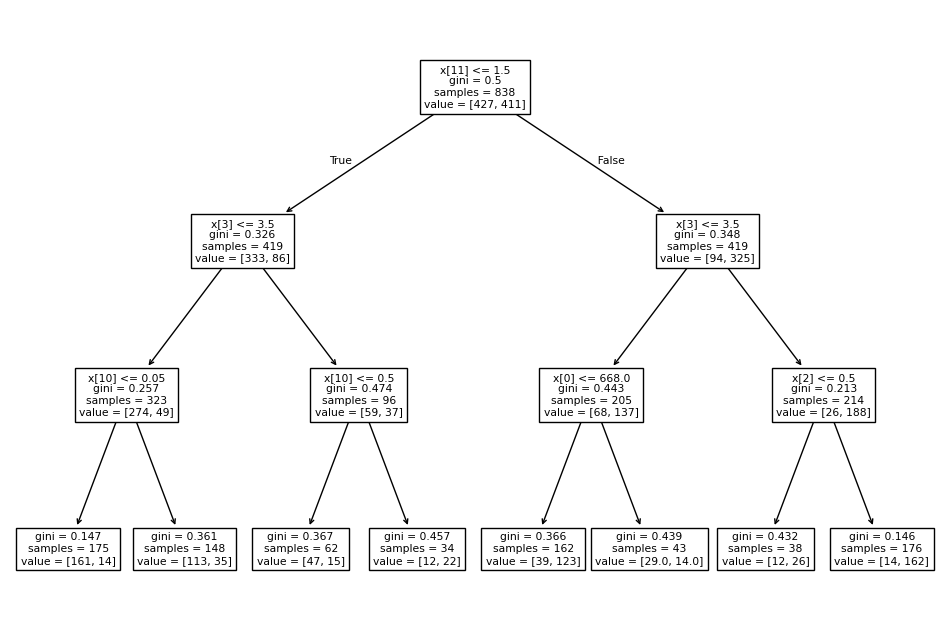

In [17]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(DTree.fit(x_train, y_train))